In [6]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [9]:
df = pd.read_excel('barrettII_eyes_clustering.xlsx')
df

,ID,AL,ACD,WTW,K1,K2,Correto
0,0,23.79,3.32,12.0,43.60,44.29,S
1,1,24.60,3.39,12.3,42.03,43.95,S
2,2,24.59,3.51,12.3,42.83,43.05,S
3,3,24.04,2.96,12.0,42.35,42.83,S
4,4,24.80,2.44,12.2,41.01,41.67,S
...,...,...,...,...,...,...,...
1523,1523,23.32,3.29,12.5,43.16,43.95,S
1524,1524,23.59,3.19,13.0,42.72,43.60,N
1525,1525,26.18,3.83,12.1,43.44,44.18,S
1526,1526,24.09,2.77,12.6,42.83,43.72,S


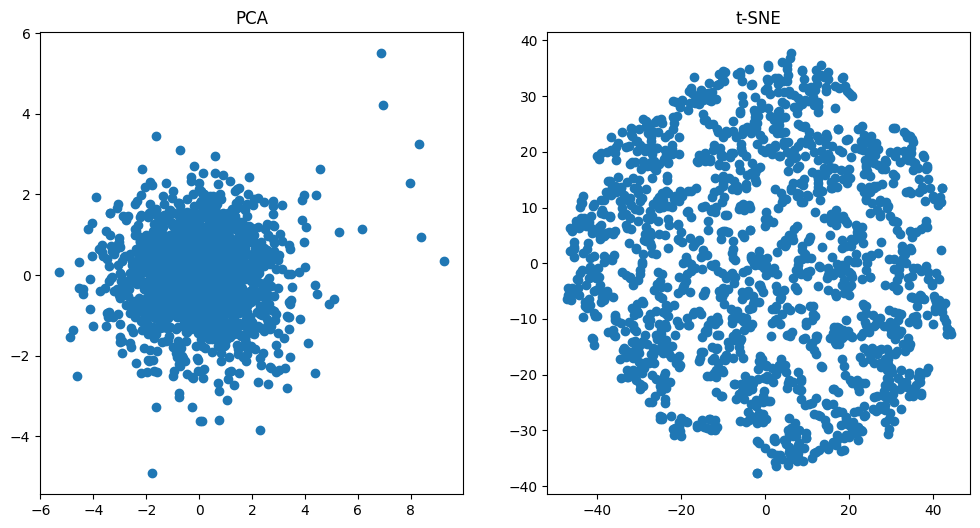

In [15]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df.drop(['Correto'], axis=1))

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(data_scaled)

# Plotando os resultados
plt.figure(figsize=(12, 6))

# PCA
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA')

# t-SNE
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
plt.title('t-SNE')

plt.show()

In [10]:
kmeans = KMeans(n_clusters=3, random_state=42)
x = df.drop(['Correto'], axis=1)

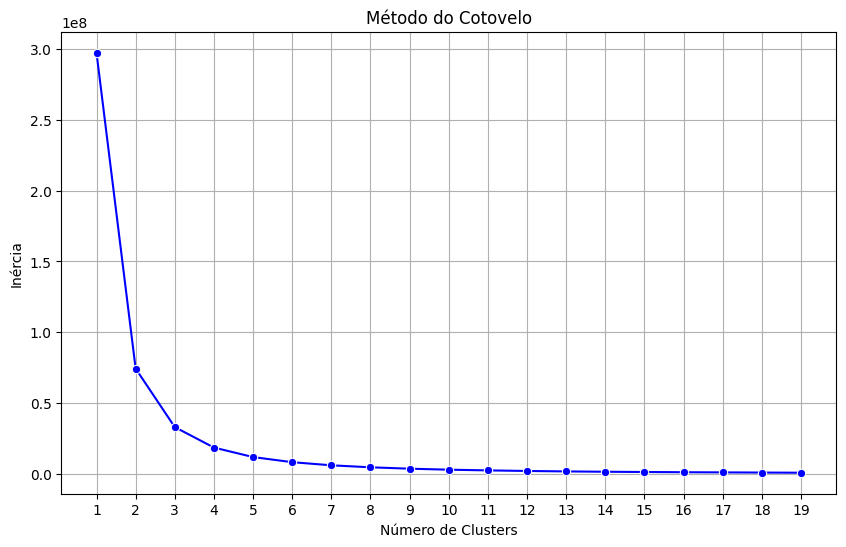

In [14]:
inertia = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

# Plotar o gráfico de cotovelo
plt.figure(figsize=(10,6))
sns.lineplot(x=range(1, 20), y=inertia, marker='o', color='b')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.xticks(range(1, 20))
plt.grid(True)
plt.show()